## Самостоятельная работа 

Мы будем использовать данные, взятые с датчиков акселерометров и гироскопов смартфонов Samsung Galaxy S3. Телефоны носили в кармане добровольцы в возрасте от 19 до 49 лет. Смартфоны постоянно фиксировали значения ускорения и скорости по трём измерениям, а поведение людей записывали на видео, чтобы вручную отметить, какую физическую активность осуществлял человек в тот или иной момент.

Данные содержат следующие признаки:

* различные показатели с акселерометра и гироскопа;
* метка активности (физическая активность человека в конкретный момент).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

X_train = np.loadtxt("train.txt")
y_train = np.loadtxt("train_labels.txt")
 
X_test = np.loadtxt("test.txt")
y_test = np.loadtxt("test_labels.txt")
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(10299, 561)

### Задание 1(1 балл)

найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

In [2]:
len(np.unique(y))

6

### Задание 2 (2 балла)

Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. Примените его ко всем значениям признаков

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

### Задание 3 (2 балла)

Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём значение 42.

<Axes: xlabel='cluster', ylabel='silhouette'>

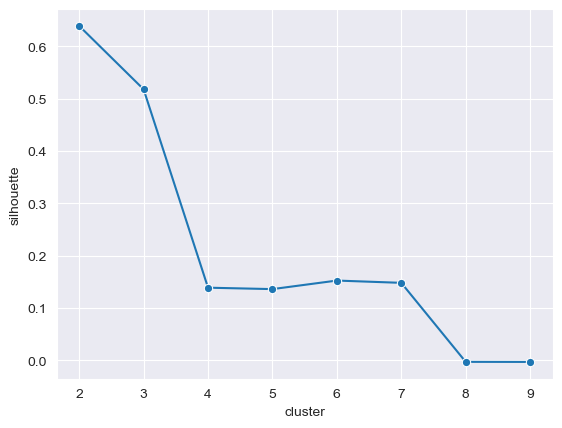

In [5]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X_scaled):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X_scaled)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X_scaled, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}


for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_scaled))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

_Возможно, вам покажется удивительным, что получилось сильное расхождение с реальным разделением на кластеры. Однако это совершенно не значит, что метрика показывает неверное значение или что алгоритм кластеризации работает некорректно. Возможно, такое разделение на другое количество кластеров можно объяснить — вы сами увидите это позднее._

### Задание 4(2 балла)

Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько значений оказалось в каждой группе?

In [6]:
from sklearn.cluster import KMeans

In [7]:
#ваш код
k_means = KMeans(n_clusters=2, random_state=42)
model = k_means.fit(X_scaled)

In [8]:
cluster_labels = pd.Series(model.labels_)
cluster_labels.value_counts()

0    5620
1    4679
Name: count, dtype: int64

### Задание 5 (2 балла)

Попробуйте применить DBSCAN. 
Сколько кластеров было выделено?
Переберите несколько параметров eps и min_samples. Как меняется количество кластеров?

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
print(f'Количество кластеров: {len(np.unique(clusters))}')

Количество кластеров: 1


In [14]:
dbscan = DBSCAN(eps=15, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

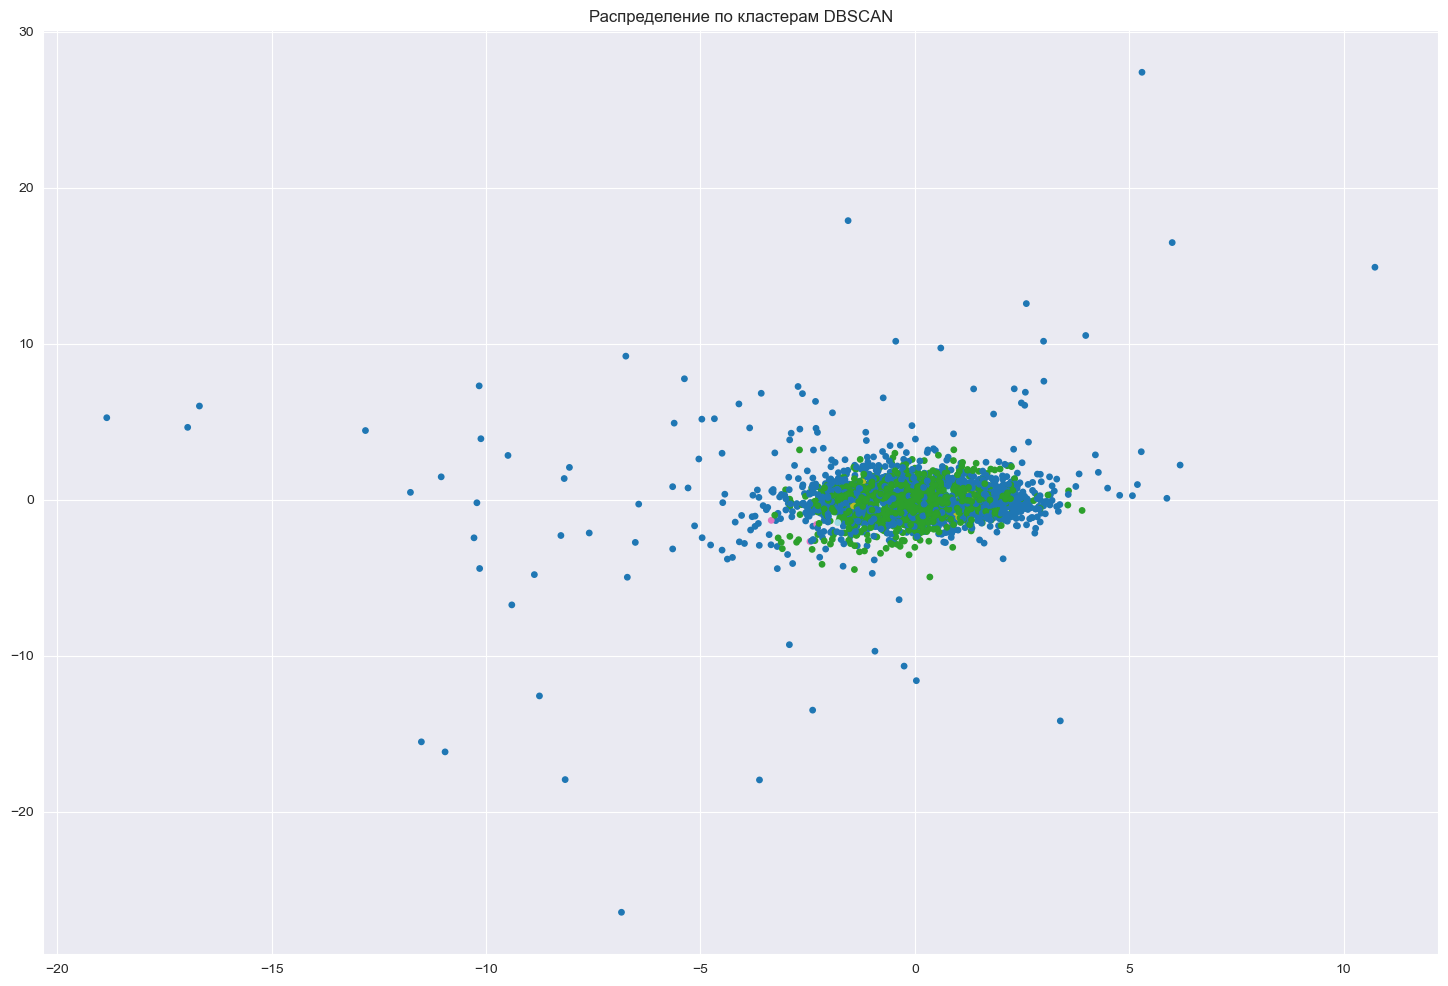

In [15]:
plt.figure(figsize=(18,12))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='tab20', marker='o', s=15)
plt.title('Распределение по кластерам DBSCAN')
plt.show()